In [770]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12

In [62]:
c = pd.read_csv(r"household.csv", quotechar="'", na_values=['N', 'M'], header=0, prefix='c')

In [63]:
d = c[(c.OMB13CBSA == 14460) & (c.RENT > 0)]

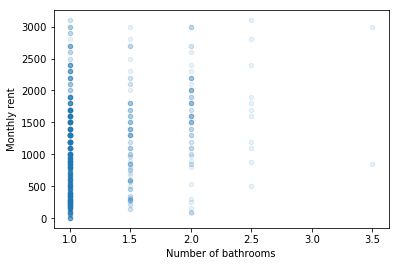

In [81]:
c[(c.OMB13CBSA == "'14460'") & (c.RENT > 0) & (c.RENT < 5000) & (c.intbaths > 0)].plot(kind='scatter', x='intbaths', y='RENT', alpha=0.1)
plt.ylabel('Monthly rent')
plt.xlabel('Number of bathrooms')
plt.show()

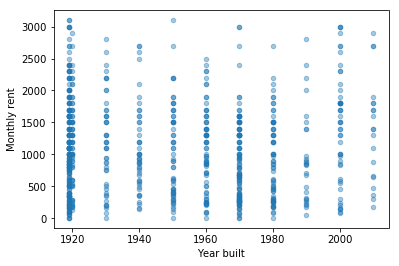

In [90]:
c[(c.OMB13CBSA == "'14460'") & (c.RENT > 0) & (c.RENT < 5000)].plot(kind='scatter', x='YRBUILT', y='RENT', alpha=0.4)
plt.ylabel('Monthly rent')
plt.xlabel('Year built')
plt.show()

In [89]:
from statsmodels.formula.api import ols
mod = ols("RENT ~ YRBUILT", data=c)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   RENT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5796
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.446
Time:                        15:40:51   Log-Likelihood:            -5.5662e+05
No. Observations:               69493   AIC:                         1.113e+06
Df Residuals:                   69491   BIC:                         1.113e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    541.9588    213.691      2.536      0.0

In [27]:
c.intbaths.hist()

In [32]:
c.BATHROOMS[0][1:-1]

'02'

In [3]:
import geocoder
g = geocoder.google('25 Chester St, Allston MA')
g.latlng

[42.3516966, -71.1284239]

----

In [49]:
np.linspace(0,5500,12)

array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
        4000.,  4500.,  5000.,  5500.])

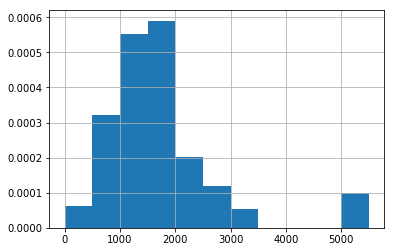

In [50]:
d[d.SEARCHNET==1].RENT.hist(weights=d[d.SEARCHNET==1].WEIGHT, bins=np.linspace(0,5500,12), normed=True)
plt.show()

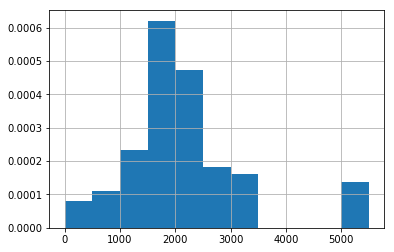

In [51]:
d[d.SEARCHREA==1].RENT.hist(weights=d[d.SEARCHREA==1].WEIGHT, bins=np.linspace(0,5500,12), normed=True)
plt.show()

In [58]:
d['rentperperson'] = d.RENT/d.NUMPEOPLE

C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


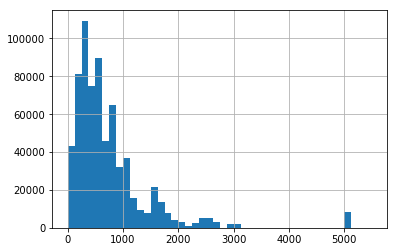

In [64]:
d.rentperperson.hist(bins=np.linspace(0,5500,45), weights=d.WEIGHT)
plt.show()

In [74]:
d[['TOTROOMS', 'RENT']].values

array([[   5,  550],
       [   3, 1100],
       [   5, 1500],
       ..., 
       [   4,  280],
       [   5,  100],
       [   5,  410]], dtype=int64)

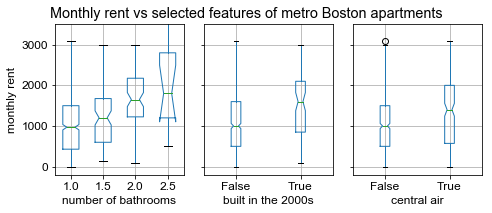

In [774]:
fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(131)
d.boxplot('RENT', 'intbaths', notch=True, ax=ax)
plt.ylim([-200,3500])
plt.xlim([.5,4.5])
plt.title('')
plt.ylabel('monthly rent')
plt.xlabel('number of bathrooms')
ax = fig.add_subplot(132)
d.boxplot('RENT', 'builtin2000s', notch=True, ax=ax)
plt.ylim([-200,3500])
ax.yaxis.set_ticklabels([])
plt.title('')
plt.xlabel('built in the 2000s')
ax = fig.add_subplot(133)
d.boxplot('RENT', 'hascentralair', notch=True, ax=ax)
ax.yaxis.set_ticklabels([])
plt.ylim([-200,3500])
plt.title('')
plt.xlabel('central air')
plt.suptitle('Monthly rent vs selected features of metro Boston apartments')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('Monthly rent vs selected features of metro Boston apartments.png', bbox_inches='tight', dpi=600)
plt.show()

In [145]:
d.hasnomustysmell.value_counts()

True     321
False     34
Name: hasnomustysmell, dtype: int64

In [139]:
d.WALLCRACK.value_counts()

2    770
1     70
Name: WALLCRACK, dtype: int64

In [73]:
def bathroomint(nums):
    if (nums == 7) | (nums == 8) | (nums == 11) | (nums == 12):
        return 0.5
    elif (nums == 1) | (nums == 9):
        return 1
    elif nums == 2:
        return 1.5
    elif nums == 3:
        return 2
    elif nums == 4:
        return 2.5
    elif nums == 5:
        return 3
    elif nums == 6:
        return 3.5
    else:
        return 0
d['intbaths'] = d.BATHROOMS.apply(bathroomint)

C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [143]:
d['intporch'] = 2 - d.PORCH
d['hascentralair'] = d.ACPRIMARY <= 4
d['hasgoodtransport'] = d.NHQPUBTRN.apply(lambda x: 2-x if x>0 else np.nan)
d['iscondo'] = 2 - d.CONDO
d['builtin2000s'] = d.YRBUILT >= 2000
d['hasnomustysmell'] = d.MUST.apply(lambda x: x==5 if x>0 else np.nan)

C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\WeiZhong\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

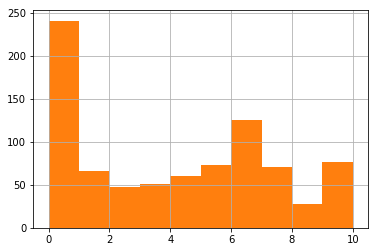

In [81]:
d.decadesafter1910.hist()
plt.show()

In [757]:
mod = glm("RENT ~ BEDROOMS + intbaths + hascentralair + hasgoodtransport + builtin2000s", data=d, family=sm.families.Poisson(),
           freq_weights=d.WEIGHT)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   RENT   No. Observations:                  779
Model:                            GLM   Df Residuals:                   668734
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.8144e+08
Date:                Mon, 11 Dec 2017   Deviance:                   3.5707e+08
Time:                        22:41:22   Pearson chi2:                 3.86e+08
No. Iterations:                     5                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.3503      0.000   4.72e+04      0.000       6.350       6.351
hascentralair[T.True]     0.1504   8.86e-05   1696.700      0.000       0.150       0.151
builtin2000s[T.True]      0.3762      0.000   3234.073      0.000       0.376       0.376
BEDROOMS                  0.1683   3.76e-05   4472.829      0.000       0.168       0.168
intbaths                  0.2306   8.44e-05   2732.119      0.000       0.230       0.231
hasgoodtransport          0.1115   9.22e-05   1208.997      0.000       0.111       0.112
=========================================================================================
"""

### Drawing the error bars

Options to deal with uncertainties:
1. Bootstrap 840, sampling with weights (very large error bars)
2. Bootstrap &lt;sum of weights&gt;, assign all weights 1
3. Bootstrap &lt;sum of weights&gt;, sample from Poisson with that mean
4. Take results from Poisson regression
5. Take results from Poisson regression after normalizing the weights to 1

#### Approach 1

In [196]:
params = pd.DataFrame()
for i in range(10000):
    d_sample = d.sample(frac=1,replace=True, weights=d.WEIGHT)
    mod2 = glm("RENT ~ BEDROOMS + intbaths + hascentralair + hasgoodtransport + builtin2000s", data=d_sample, family=sm.families.Poisson(),
               freq_weights=d_sample.WEIGHT)
    res2 = mod2.fit()
    params[i] = res2.params

#### Approach 2

This is really redoing the regression with the weights reassigned. Each row's weight follows a binomial distribution with $n$ the sum of weights and $p$ the row's weight over the sum of weights.

In [715]:
int(round(sum(d.WEIGHT)))

722038

In [737]:
params4 = pd.DataFrame()
for i in range(10000):
    bootstrap_weights = ss.binom.rvs(int(round(sum(d.WEIGHT))), d.WEIGHT/sum(d.WEIGHT))
    mod4 = glm("RENT ~ BEDROOMS + intbaths + hascentralair + hasgoodtransport + builtin2000s", data=d, family=sm.families.Poisson(),
              freq_weights=bootstrap_weights)
    res4 = mod4.fit()
    params4[i] = res4.params
params4

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Intercept,6.347409,6.353604,6.354437,6.349720,6.352153,6.349092,6.347102,6.349901,6.354814,6.348257,...,6.347058,6.348462,6.346943,6.353721,6.347831,6.353005,6.351438,6.345352,6.353931,6.344705
hascentralair[T.True],0.149844,0.149354,0.154381,0.149450,0.153924,0.152624,0.151257,0.148397,0.149755,0.149292,...,0.151929,0.154016,0.150056,0.151490,0.147874,0.148412,0.151397,0.148575,0.150429,0.152090
builtin2000s[T.True],0.376960,0.375830,0.376115,0.379762,0.376791,0.375364,0.372853,0.381234,0.378710,0.375086,...,0.377460,0.376691,0.375091,0.378482,0.380561,0.377735,0.375273,0.378485,0.380475,0.374481
BEDROOMS,0.168392,0.166933,0.167510,0.168269,0.168163,0.168990,0.168132,0.167069,0.168198,0.167611,...,0.168585,0.169455,0.168716,0.166732,0.169593,0.168355,0.167564,0.168358,0.168741,0.169084
intbaths,0.232700,0.231179,0.229173,0.232584,0.228024,0.229810,0.232983,0.232017,0.228689,0.233894,...,0.230631,0.228784,0.233397,0.232032,0.231045,0.230451,0.231483,0.233460,0.227124,0.232342
hasgoodtransport,0.111642,0.111121,0.109538,0.109320,0.111050,0.112410,0.112118,0.111944,0.108540,0.109554,...,0.113775,0.112174,0.111306,0.109341,0.110167,0.109830,0.112177,0.113223,0.112237,0.113275


In [740]:
quantiles4 = params4.quantile([0.025, 0.975], axis=1)#.apply(np.exp).transpose()[1:]
quantiles4

,Intercept,hascentralair[T.True],builtin2000s[T.True],BEDROOMS,intbaths,hasgoodtransport
0.025,6.344197,0.145802,0.36972,0.166197,0.226194,0.107263
0.975,6.356446,0.154892,0.38265,0.170333,0.235088,0.115646


#### Approach 5

In [711]:
mod3 = glm("RENT ~ BEDROOMS + intbaths + hascentralair + hasgoodtransport + builtin2000s", data=d, family=sm.families.Poisson(),
           freq_weights=d.WEIGHT/sum(d.WEIGHT)*840)
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   RENT   No. Observations:                  779
Model:                            GLM   Df Residuals:                      771
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -2.1108e+05
Date:                Mon, 11 Dec 2017   Deviance:                   4.1541e+05
Time:                        22:01:52   Pearson chi2:                 4.49e+05
No. Iterations:                     5                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.3503      0.004   1611.572      0.000       6.343       6.358
hascentralair[T.True]     0.1504      0.003     57.872      0.000       0.145       0.155
builtin2000s[T.True]      0.3762      0.003    110.309      0.000       0.370       0.383
BEDROOMS                  0.1683      0.001    152.560      0.000       0.166       0.170
intbaths                  0.2306      0.002     93.188      0.000       0.226       0.235
hasgoodtransport          0.1115      0.003     41.237      0.000       0.106       0.117
=========================================================================================
"""

In [762]:
quantiles = res3.conf_int().apply(np.exp).rename(columns={0: 0.025, 1: 0.975})[1:]
mean_with_quantiles = pd.concat([pd.DataFrame(res.params.apply(np.exp)[1:], columns=['mean']), quantiles], axis=1)

mean_with_quantiles = mean_with_quantiles.rename(
                    index={'hascentralair[T.True]': 'has central air          ',
                           'builtin2000s[T.True]': 'built in the 21st century          ',
                          'BEDROOMS': 'every additional bedroom          ',
                          'intbaths': 'every additional bathroom          ',
                          'hasgoodtransport': 'good access to public transport          \n(self-assessed)          '}).sort_values(by='mean',ascending=False)

In [764]:
mean_with_quantiles['lowerror'] = mean_with_quantiles['mean'] - mean_with_quantiles[0.025]
mean_with_quantiles['higherror'] = mean_with_quantiles[0.975] - mean_with_quantiles['mean'] 

In [766]:
mean_with_quantiles

,mean,0.025,0.975,lowerror,higherror
built in the 21st century,1.456754,1.447049,1.466524,0.009705,0.009770
every additional bathroom,1.259398,1.253304,1.265522,0.006094,0.006124
every additional bedroom,1.183268,1.180713,1.185829,0.002555,0.002561
has central air,1.162285,1.156381,1.168220,0.005905,0.005935
good access to public transport \n(self-assessed),1.117906,1.111999,1.123843,0.005906,0.005938


In [755]:
bath_bump = res.params.apply(np.exp)['intbaths'] - 1
ac_bump = res.params.apply(np.exp)['hascentralair[T.True]'] - 1
new_bump = res.params.apply(np.exp)['builtin2000s[T.True]'] - 1

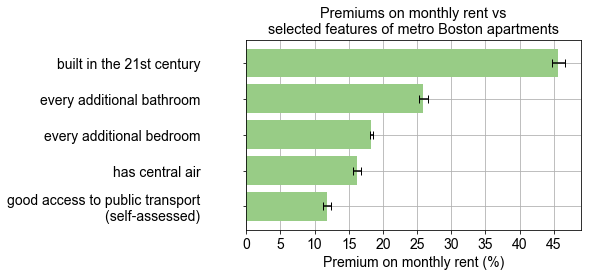

In [844]:
import matplotlib.ticker as plticker

plt.rc('ytick', labelsize=14) 
plt.rc('xtick', labelsize=14) 
plt.rc('axes', labelsize=14) 
plt.figure(figsize=(6,3.5))
ax = ((mean_with_quantiles['mean'] - 1)*100).plot.barh(xerr=[(100*mean_with_quantiles[['lowerror', 'higherror']]).values.T], capsize=4, width=0.8, color='#98cc86')
ax.set_axisbelow(True)
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=5))
ax.grid()
plt.title('Premiums on monthly rent vs\nselected features of metro Boston apartments')
plt.xlabel('Premium on monthly rent (%)')
ax.invert_yaxis()
plt.savefig('Multipliers on monthly rent.png', bbox_inches='tight', dpi=600)
plt.show()

## Figuring out the baseline distribution 

In [219]:
g = pd.read_csv('property-assessment-fy2017.csv')

C:\Users\WeiZhong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [229]:
h = g[g.LU.isin(['A', 'CD', 'R1', 'R2', 'R3', 'R4'])]

In [260]:
g[g.ZIPCODE == '02134_'].LU.value_counts()

CD    2080
R2     559
R1     369
R3     311
A      227
C      202
CM     143
R4     119
CL      94
E       80
RL      70
RC      67
CC      42
I       19
CP      18
EA      12
Name: LU, dtype: int64

In [836]:
# has central air
allston_ac =(h[h.ZIPCODE == '02134_'].U_AC == 'C').mean()
h[h.ZIPCODE == '02134_'].U_AC.value_counts(normalize=True)

N    0.710096
C    0.289904
Name: U_AC, dtype: float64

In [837]:
chinatown_ac =(h[h.ZIPCODE == '02111_'].U_AC == 'C').mean()
h[h.ZIPCODE == '02111_'].U_AC.value_counts(normalize=True)

C    0.946991
N    0.053009
Name: U_AC, dtype: float64

In [838]:
allston_new = (h[h.ZIPCODE == '02134_'].YR_BUILT>1999).mean()
(h[h.ZIPCODE == '02134_'].YR_BUILT>1999).value_counts(normalize=True)

False    0.962347
True     0.037653
Name: YR_BUILT, dtype: float64

In [839]:
chinatown_new = (h[h.ZIPCODE == '02111_'].YR_BUILT>1999).mean()
(h[h.ZIPCODE == '02111_'].YR_BUILT>1999).value_counts(normalize=True)

False    0.5568
True     0.4432
Name: YR_BUILT, dtype: float64

In [312]:
allston_bath = (h[h.ZIPCODE == '02134_'].U_FULL_BTH + 0.5*h[h.ZIPCODE == '02134_'].U_HALF_BTH).mean()
allston_bath

1.210576923076923

In [313]:
chinatown_bath = (h[h.ZIPCODE == '02111_'].U_FULL_BTH + 0.5*h[h.ZIPCODE == '02111_'].U_HALF_BTH).mean()
chinatown_bath

1.7374378796245169

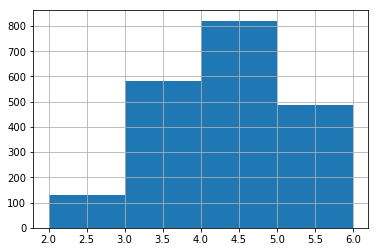

In [277]:
h[h.ZIPCODE == '02134_'].U_TOT_RMS.apply(float).hist(bins=[2,3,4,5,6])
plt.show()

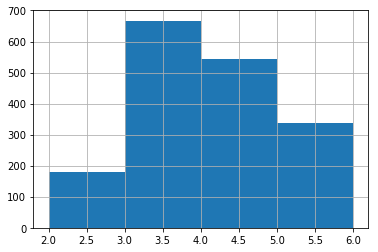

In [278]:
h[h.ZIPCODE == '02111_'].U_TOT_RMS.apply(float).hist(bins=[2,3,4,5,6])
plt.show()

In [ ]:
g[g.ZIPCODE == 'Y'].U_AC.value_counts()

In [384]:
# Data from Zillow, Oct 2017
# Traditional approach:
# [1 bed, 2 bed, 3 bed, 4 bed]
allston_ave = [1750, 2250, 2700, 3300]
chinatown_ave = [2885.5, 3871, 3871*1.258, 3871*1.258*1.2736]
# multipliers are average of https://www.southendapartments.com/blog/average-rent-prices-in-south-end and https://www.backbaypads.com/blog/average-rent-prices-in-back-bay

In [382]:
bath_counts_chinatown = (h[h.ZIPCODE == '02111_'].U_FULL_BTH + 0.5*h[h.ZIPCODE == '02111_'].U_HALF_BTH).value_counts()
bath_counts_allston = (h[h.ZIPCODE == '02134_'].U_FULL_BTH + 0.5*h[h.ZIPCODE == '02134_'].U_HALF_BTH).value_counts()

bath_deflator_chinatown = np.average((1+bath_bump)**(bath_counts_chinatown.index-1), weights=bath_counts_chinatown.values)
bath_deflator_allston = np.average((1+bath_bump)**(bath_counts_allston.index-1), weights=bath_counts_allston.values)

In [388]:
1+allston_new*new_bump

1.0171983724527609

In [431]:
# Baseline: Built before 2000, no central air (for Allston), central air (for Chinatown)

allston_baseline = allston_ave/(1+allston_new*new_bump)/(1+allston_ac*ac_bump)/bath_deflator_allston
allston_baseline = np.array([allston_baseline, allston_baseline*(1+bath_bump)])
allston_baseline[1,0] = 0 # zero out 1 bed 2 bath 
chinatown_baseline = chinatown_ave/(1+chinatown_new*new_bump)/(1+chinatown_ac*ac_bump)/bath_deflator_chinatown*(1+ac_bump)
chinatown_baseline = np.array([chinatown_baseline, chinatown_baseline*(1+bath_bump)])
chinatown_baseline[1,0] = 0 # zero out 1 bed 2 bath 


In [432]:
print("Allston (+16% if central air)")
print(np.around(allston_ave, -1).astype(int))
print(np.around(allston_baseline, -1).astype(int))
print(np.around(allston_baseline*(1+new_bump), -1).astype(int))
print()
print("Chinatown (−16% if no central air)")
print(np.around(chinatown_ave, -1).astype(int))
print(np.around(chinatown_baseline, -1).astype(int))
print(np.around(chinatown_baseline*(1+new_bump), -1).astype(int))

Allston (+16% if central air)
[1750 2250 2700 3300]
[[1590 2040 2450 2990]
 [   0 2570 3090 3770]]
[[2310 2970 3570 4360]
 [   0 3750 4490 5490]]

Chinatown (−16% if no central air)
[2890 3870 4870 6200]
[[2010 2700 3390 4320]
 [   0 3400 4270 5440]]
[[2930 3930 4940 6290]
 [   0 4950 6220 7920]]


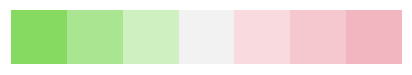

In [832]:
sns.palplot(sns.diverging_palette(120, 0, l=80, n=7))
plt.axis('off')
plt.savefig('Color coding.png', bbox_inches='tight')
plt.show()

Value-coded based on price per room

Allston (background)


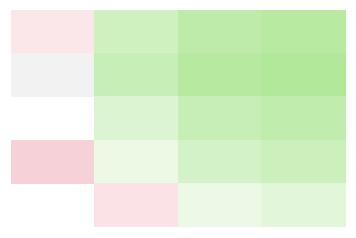

Chinatown (background)


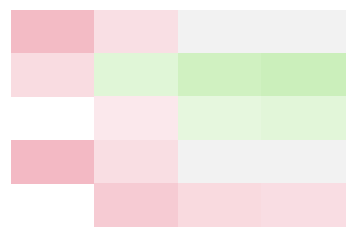

In [492]:
allston_baseline[1,0] = np.nan
chinatown_baseline[1,0] = np.nan
print('Value-coded based on price per room')
print('')
print('Allston (background)')
sns.heatmap(np.multiply(np.concatenate(([allston_ave], allston_baseline, allston_baseline*(1+new_bump))),[[1,1/2,1/3,1/4]]*5), 
            vmin=200, vmax=3000,
            cmap=sns.diverging_palette(120, 0, l=80, as_cmap=True),
           cbar=False, xticklabels=False, yticklabels=False)
plt.show()
print('Chinatown (background)')
sns.heatmap(np.multiply(np.concatenate(([chinatown_ave], chinatown_baseline, chinatown_baseline*(1+new_bump))), [[1,1/2,1/3,1/4]]*5), 
            vmin=200, vmax=3000,
            cmap=sns.diverging_palette(120, 0, l=80, as_cmap=True),
           cbar=False, xticklabels=False, yticklabels=False)
plt.show()

## Drawing a pretty map

In [52]:
coords = np.transpose([[42.2913, 42.3152, 42.3702, 42.3097, 42.3464, 42.2771, 42.3381, 42.2565, 42.2832, 42.2798, 42.3388, 42.3148, 42.3539, 42.3394, 42.3503, 42.3782, 42.3490, 42.3296, 42.3647, 42.3588, 42.3501, 42.3644, 42.3555, 42.3490],
-np.asarray([71.0605, 71.0914, 71.0389, 71.1151, 71.1627, 71.0914, 71.0476, 71.1241, 71.1270, 71.1627, 71.0765, 71.0587, 71.1337, 71.0940, 71.0810, 71.0602, 71.0975, 71.1062, 71.0542, 71.0707, 71.0624, 71.0661, 71.0594, 71.0698])])

theseColors = ['#CD0000', '#CD0000', '#008000', '#CD0000', '#008000', '#CD0000', '#CD0000', '#CD0000', '#CD0000', '#CD0000', '#008000', '#CD0000', '#008000', '#008000', '#008000', '#008000', '#008000', '#CD0000', '#008000', '#008000', '#008000', '#008000', '#008000', '#008000']

In [9]:
from mapbox import Static

service = Static(access_token='pk.eyJ1Ijoid2VpemhvbmciLCJhIjoiY2piMW5mNm05MjIxMTMybzE0eXFwb3F6MSJ9._LaBPZzCc-Xr7R-9ODLh4w')

200

In [58]:
features = [{'type': 'Feature', 'properties': {'marker-color': theseColors[i]},
             'geometry': {'type': 'Point', 'coordinates': [coords[i][1], coords[i][0]]}} for i in range(len(coords))]

In [59]:
response = service.image('mapbox.streets', features=features)

In [60]:
with open('map.png', 'wb') as output:
    output.write(response.content)

![Boston neighborhoods colored by rent evolution](map.png)